In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_excel('Rohdaten Aufgabe 2 - Kandidatenversion.xlsx')
df = df0.copy()

In [3]:
df.head()

,Kürzel E1,Bereich E1,Kürzel E2,Bereich E2,Ausprägung,Name,ZEIT,NR,MONAT,User Pseudo,ABTEILUNG,BERICHT,IST_KONZERNBERICHT,Anzahl
0,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-08-26 10:17:01,1926,2020-08-01,User_104,Einkauf,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1
1,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-09-22 11:02:31,13499,2020-09-01,User_404,Einkauf,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1
2,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-16 13:03:47,23214,2020-10-01,User_85,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1
3,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-16 15:16:31,23293,2020-10-01,User_206,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1
4,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-22 14:52:39,24745,2020-10-01,User_85,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1


In [4]:
df.info()

# Spalten mit denselben

# Kürzel E1 --> Bereich E1
# Kürzel E2 --> Bereich E2
# Ausprägung --> BERICHT
# ZEIT  --> MONAT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86288 entries, 0 to 86287
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Kürzel E1           86288 non-null  object        
 1   Bereich E1          86288 non-null  object        
 2   Kürzel E2           86288 non-null  object        
 3   Bereich E2          86288 non-null  object        
 4   Ausprägung          86288 non-null  object        
 5   Name                50269 non-null  object        
 6   ZEIT                86288 non-null  datetime64[ns]
 7   NR                  86288 non-null  int64         
 8   MONAT               86288 non-null  datetime64[ns]
 9   User Pseudo         86288 non-null  object        
 10  ABTEILUNG           86288 non-null  object        
 11  BERICHT             86288 non-null  object        
 12  IST_KONZERNBERICHT  86288 non-null  int64         
 13  Anzahl              86288 non-null  int64     

In [5]:
df.isnull().sum()
# Bei 'Name' Spalte gibt es 36019 fehlende Werte

Kürzel E1                 0
Bereich E1                0
Kürzel E2                 0
Bereich E2                0
Ausprägung                0
Name                  36019
ZEIT                      0
NR                        0
MONAT                     0
User Pseudo               0
ABTEILUNG                 0
BERICHT                   0
IST_KONZERNBERICHT        0
Anzahl                    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Kürzel E1', 'Bereich E1', 'Kürzel E2', 'Bereich E2', 'Ausprägung',
       'Name', 'ZEIT', 'NR', 'MONAT', 'User Pseudo', 'ABTEILUNG', 'BERICHT',
       'IST_KONZERNBERICHT', 'Anzahl'],
      dtype='object')

In [8]:
df.describe()

,NR,IST_KONZERNBERICHT,Anzahl
count,86288.000000,86288.000000,86288.0
mean,58600.742954,0.025936,1.0
std,33891.254781,0.158947,0.0
min,39.000000,0.000000,1.0
25%,29021.500000,0.000000,1.0
50%,58037.000000,0.000000,1.0
75%,88036.250000,0.000000,1.0
max,117102.000000,1.000000,1.0


In [9]:
df['Kürzel E1'].value_counts()

WAR     42950
UMS     29053
ESHP     9015
KST      3143
ERG      2127
Name: Kürzel E1, dtype: int64

In [10]:
df['Bereich E1'].value_counts()

Ware                 42950
Umsatz und Absatz    29053
eShop-Portal          9015
Kosten                3143
Ergebnis              2127
Name: Bereich E1, dtype: int64

In [11]:
# WAR --> Ware
# UMS --> Umsatz und Absatz
# ESHP --> eShop-Portal
# KST --> Kosten
# ERG --> Ergebnis

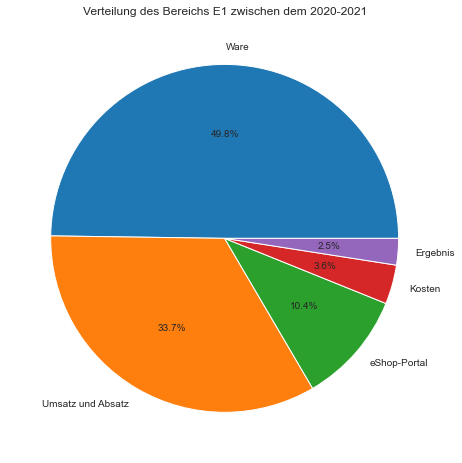

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=df['Bereich E1'].value_counts().values,
       labels=['Ware', 'Umsatz und Absatz','eShop-Portal','Kosten','Ergebnis'],
       autopct='%.1f%%'
       )
ax.set_title("Verteilung des Bereichs E1 zwischen dem 2020-2021")
plt.show()


In [13]:
df['Kürzel E2'].value_counts()

WARTAG           12070
WARKLK           11799
KSTTAGROH        11615
UMSTAGUMS         8709
WARALTSTR         8699
WARUMSABS         7637
ESHUMS            5121
UMSENTVGL         3155
ESHERG            2607
EXPANS            2485
KSTPERS           2214
ERGGUV            1223
WARRED            1212
WARBESTPBC023     1211
ESHWAR            1093
UMSHOCHR           953
UMSKUNFRE          884
ERGDB              734
UMSINDEX           696
INVEST             488
WARBESTLD          322
UMSENTJUN          277
KSTLOG             209
ESHKST             194
ERGROH             170
KSTABW             167
UMSTAGABS          146
UMSVGLBRA           95
KSTWERB             60
UMSTAGGEB           27
UMSBONANALYSE       11
KSTREISE             5
Name: Kürzel E2, dtype: int64

In [14]:
df['Bereich E2'].value_counts()

Tagesschau                       12070
Kalkulation                      11799
Tagesrohertrag                   11615
Tagesumsatz                       8709
Altersstruktur                    8699
Umsatz und Absatz                 7637
Umsatz und Absatz eShop           5121
Umsatz + Paarzahl GL              3155
Ergebnis eShop                    2607
Expansion                         2485
Personal                          2214
GuV                               1223
Preisreduzierungen                1212
PBC023 Bestand                    1211
Ware eShop                        1093
Umsatzhochrechnung                 953
Besucherfrequenz                   884
DB-Berichte                        734
Umsatzindex                        696
Investitionen                      488
Lagerdrehung                       322
Deichmann Jr.-Berichte             277
Logistik                           209
Kosten eShop                       194
Rohertrag                          170
Abweichungsanalyse       

In [15]:
# WARTAG           Tagesschau
# WARKLK           Kalkulation   
# KSTTAGROH        Tagesrohertrag
# UMSTAGUMS        Tagesumsatz
# WARALTSTR        Altersstruktur 
# WARUMSABS        Umsatz und Absatz
# ESHUMS           Umsatz und Absatz eShop   
# UMSENTVGL        Umsatz + Paarzahl GL  
# ESHERG           Ergebnis eShop
# EXPANS           Expansion
# KSTPERS          Personal
# ERGGUV           GuV
# WARRED           Preisreduzierungen 
# WARBESTPBC023    PBC023 Bestand
# ESHWAR           Ware eShop
# UMSHOCHR         Umsatzhochrechnung
# UMSKUNFRE        Besucherfrequenz
# ERGDB            DB-Berichte
# UMSINDEX         Umsatzindex
# INVEST           Investitionen
# WARBESTLD        Lagerdrehung
# UMSENTJUN        Deichmann Jr.-Berichte
# KSTLOG           Logistik 
# ESHKST           Kosten eShop
# ERGROH           Rohertrag
# KSTABW           Abweichungsanalyse
# UMSTAGABS        Tagespaarzahl
# UMSVGLBRA        Umsatzvergl. DSD mit Branche 
# KSTWERB          Werbung 
# UMSTAGGEB        Tagesums. u. Paarz. n. Gebiet
# UMSBONANALYSE    Bonanalyse                      
# KSTREISE         Reisekosten


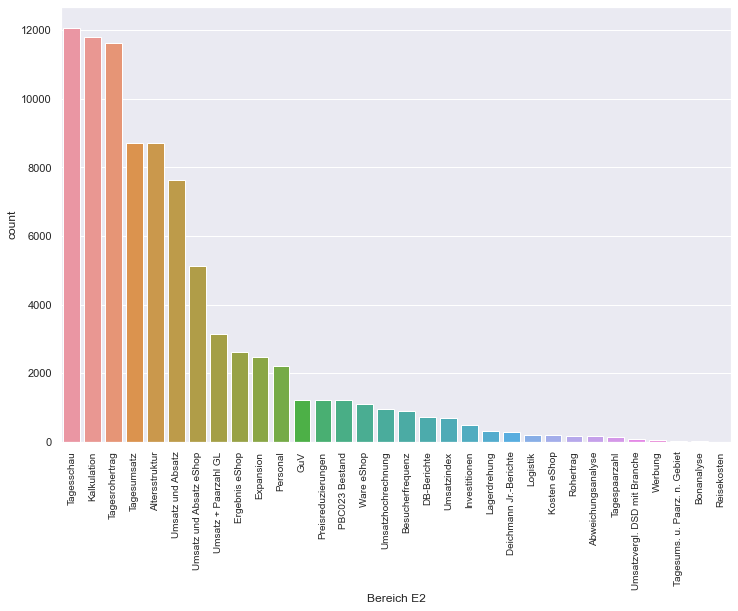

In [16]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x='Bereich E2', data=df,order = df['Bereich E2'].value_counts().index)
plt.xticks(size=10,rotation=90);

##  Unterteilungen von Bereich E1

In [17]:
# Unterteilungen von Ware
df[df['Bereich E1'] == 'Ware']['Bereich E2'].value_counts()

Tagesschau            12070
Kalkulation           11799
Altersstruktur         8699
Umsatz und Absatz      7637
Preisreduzierungen     1212
PBC023 Bestand         1211
Lagerdrehung            322
Name: Bereich E2, dtype: int64

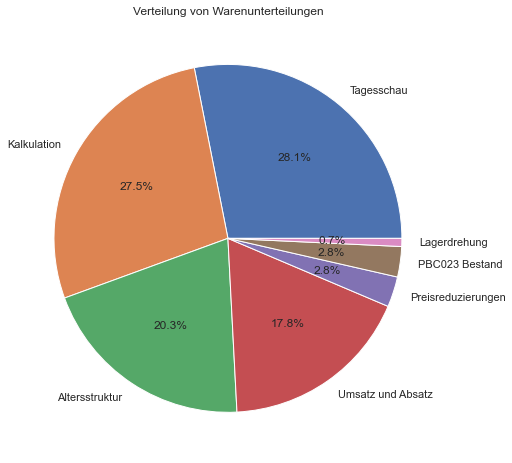

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=df[df['Bereich E1'] == 'Ware']['Bereich E2'].value_counts().values,
       labels=['Tagesschau', 'Kalkulation','Altersstruktur','Umsatz und Absatz','Preisreduzierungen','PBC023 Bestand','Lagerdrehung'],
       autopct='%.1f%%'
       )
ax.set_title("Verteilung von Warenunterteilungen")
plt.show()

In [19]:
# Unterteilungen von Umsatz und Absatz
df[df['Bereich E1'] == 'Umsatz und Absatz']['Bereich E2'].value_counts()

Tagesrohertrag                   11615
Tagesumsatz                       8709
Umsatz + Paarzahl GL              3155
Expansion                         2485
Umsatzhochrechnung                 953
Besucherfrequenz                   884
Umsatzindex                        696
Deichmann Jr.-Berichte             277
Tagespaarzahl                      146
Umsatzvergl. DSD mit Branche        95
Tagesums. u. Paarz. n. Gebiet       27
Bonanalyse                          11
Name: Bereich E2, dtype: int64

In [20]:
# Unterteilungen von eShop-Portal
df[df['Bereich E1'] == 'eShop-Portal']['Bereich E2'].value_counts()

Umsatz und Absatz eShop    5121
Ergebnis eShop             2607
Ware eShop                 1093
Kosten eShop                194
Name: Bereich E2, dtype: int64

In [21]:
# Unterteilungen von Kosten
df[df['Bereich E1'] == 'Kosten']['Bereich E2'].value_counts()

Personal              2214
Investitionen          488
Logistik               209
Abweichungsanalyse     167
Werbung                 60
Reisekosten              5
Name: Bereich E2, dtype: int64

In [22]:
# Unterteilungen von Ergebnis
df[df['Bereich E1'] == 'Ergebnis']['Bereich E2'].value_counts()

GuV            1223
DB-Berichte     734
Rohertrag       170
Name: Bereich E2, dtype: int64

In [23]:
df['Ausprägung'].value_counts()
# Im Daten haben wir 281 verschiedene Ausprägungen

TAGROH200D              10177
TAFIAR200_SG             7202
Tag_Ums                  6580
TAFIVA200_SG_1           4140
eShop_Ums_Abs_GL         2724
                        ...  
Leerkartonfunde_mon         1
TOP50_Menge_Woche           1
11_UKL_BJ_VJ                1
Umtausch_mon                1
ExpRate_MYS_MAT_2019        1
Name: Ausprägung, Length: 281, dtype: int64

In [24]:
df['Name'].value_counts()

TAFIAR200    12066
TAGROH200    10177
TAFIVA200     8549
KALKUL202     8150
MOFIAR201     5161
MOFIAR203     1130
KOMWAR201     1003
MOORAR202      831
TAGROH201      754
BESTAN202      712
WAREIN200      629
BESTAN201      489
ALTSTR201      262
MOFIPR205      178
AUSREC222      124
MOFIAR202       36
WAREIN201       18
Name: Name, dtype: int64

In [25]:
df[df['Name'].isnull()== False]['Ausprägung'].nunique()

118

## Zeitliche Erkenntnisse

In [26]:
df['ZEIT'].value_counts()

2021-07-27 07:09:22    6
2021-03-22 06:16:26    6
2020-09-30 16:38:14    5
2021-06-15 08:42:15    5
2020-10-05 14:10:57    5
                      ..
2021-05-17 09:15:21    1
2021-05-17 08:37:13    1
2021-05-17 07:32:12    1
2021-05-16 15:04:39    1
2021-08-27 14:09:43    1
Name: ZEIT, Length: 82639, dtype: int64

In [27]:
# erste Zeit, der Aufruf gemacht wurde
df['ZEIT'].min()

Timestamp('2020-08-12 14:07:42')

In [28]:
# letzte Zeit, der Aufruf gemacht wurde
df['ZEIT'].max()

Timestamp('2021-08-30 15:10:37')

In [29]:
df['ZEIT'].max() - df['ZEIT'].min()

Timedelta('383 days 01:02:55')

In [30]:
df['Tag'] = df['ZEIT'].dt.day_name()

In [31]:
df.Tag.value_counts()

Monday       21655
Tuesday      17727
Wednesday    15886
Thursday     15505
Friday       12982
Sunday        1551
Saturday       982
Name: Tag, dtype: int64

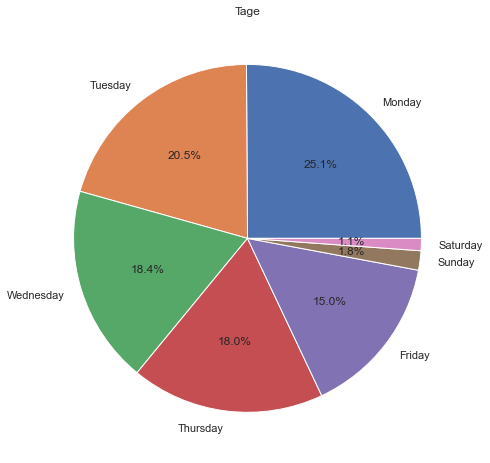

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=df.Tag.value_counts().values,
       labels=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday'],
       autopct='%.1f%%'
       )
ax.set_title("Tage")
plt.show()

# Wir sehen manche Mitarbeiter, die auch Wochenende tätig sind. 
# 2,9 % von Aufrufe wurde am Wochenende gemacht.

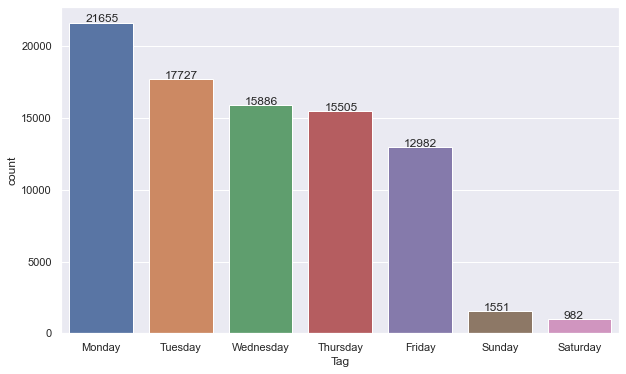

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x="Tag", data =df,order = df['Tag'].value_counts().index)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+20));

In [34]:
df['UHR']=df['ZEIT'].dt.hour

In [35]:
df['UHR'].value_counts()
# Wir sehen, dass die Menschen zu Beginn der Arbeitszeit intensiver arbeiten.

8     15105
9     13520
10     9687
11     7998
13     6475
14     6372
7      5791
12     5560
15     5337
16     4411
17     2210
6      1097
18      993
21      376
19      351
20      344
22      308
5       132
23      118
0        46
4        24
3        13
1        11
2         9
Name: UHR, dtype: int64

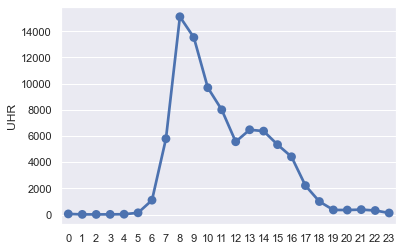

In [36]:
sns.pointplot(x=df['UHR'].value_counts().index,y=df['UHR'].value_counts())
sns.set(rc = {'figure.figsize':(8,10)})
plt.xticks(np.arange(0, 24, step=1),rotation=0);
# Verteilung nach Uhr

In [37]:
# Wenn wir Arbeitszeiten zwischen 8 - 17 Uhr feststellen
df[(df['UHR'] < 18) & (df['UHR'] > 7)].count()

Kürzel E1             76675
Bereich E1            76675
Kürzel E2             76675
Bereich E2            76675
Ausprägung            76675
Name                  42988
ZEIT                  76675
NR                    76675
MONAT                 76675
User Pseudo           76675
ABTEILUNG             76675
BERICHT               76675
IST_KONZERNBERICHT    76675
Anzahl                76675
Tag                   76675
UHR                   76675
dtype: int64

In [38]:
df[~((df['UHR'] < 18) & (df['UHR'] > 7))].count()
# Aufrufe außerhalb der Arbeitszeit
# 9613/86288 = 0.11
# 11% von Aufrufe außerhalb der Arbeitszeit

Kürzel E1             9613
Bereich E1            9613
Kürzel E2             9613
Bereich E2            9613
Ausprägung            9613
Name                  7281
ZEIT                  9613
NR                    9613
MONAT                 9613
User Pseudo           9613
ABTEILUNG             9613
BERICHT               9613
IST_KONZERNBERICHT    9613
Anzahl                9613
Tag                   9613
UHR                   9613
dtype: int64

In [39]:
df['NR'].value_counts()

20719     2
61130     2
63065     2
62813     2
62751     2
         ..
22688     1
22687     1
22686     1
22682     1
116653    1
Name: NR, Length: 84715, dtype: int64

In [40]:
df['MONAT'].value_counts()

2020-09-01    9090
2020-10-01    8199
2020-11-01    7806
2020-12-01    7744
2021-06-01    7419
2021-05-01    6776
2021-01-01    6651
2021-03-01    6381
2021-07-01    6309
2021-04-01    6127
2021-08-01    5743
2021-02-01    5025
2020-08-01    3018
Name: MONAT, dtype: int64

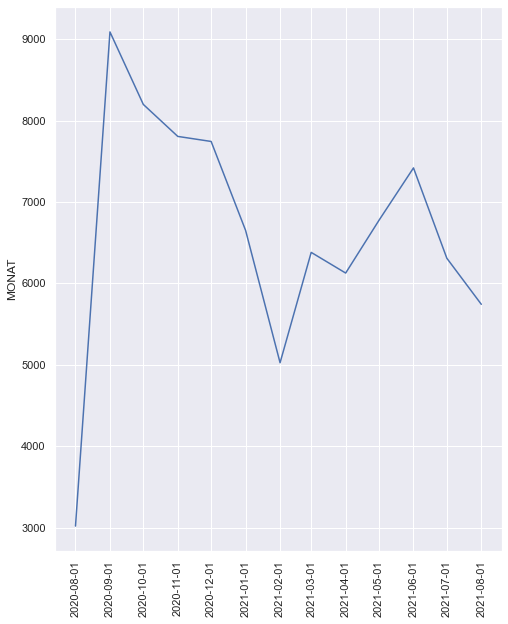

In [41]:
sns.lineplot(x=df['MONAT'].value_counts().index,y=df['MONAT'].value_counts())
sns.set(rc = {'figure.figsize':(8,15)})
plt.xticks(df['MONAT'].unique(),rotation=90);
# Verteilung nach Monaten

In [42]:
df['User Pseudo'].value_counts()
# von User_1 bis User_422, haben wir 422 User

User_310    3098
User_136    2487
User_382    2407
User_384    1857
User_221    1507
            ... 
User_332       1
User_14        1
User_172       1
User_261       1
User_141       1
Name: User Pseudo, Length: 422, dtype: int64

In [43]:
df[((df['UHR'] < 18) & (df['UHR'] > 7))]['User Pseudo'].value_counts().head(10)
# Mitarbeiter, die am meisten in der Arbeitszeit arbeiten

User_310    3032
User_136    2405
User_382    2293
User_384    1711
User_276    1394
User_164    1299
User_317    1282
User_222    1251
User_171    1133
User_74     1078
Name: User Pseudo, dtype: int64

In [44]:
df[~((df['UHR'] < 18) & (df['UHR'] > 7))]['User Pseudo'].value_counts().head(10)
# Mitarbeiter, die am meisten außerhalb der Arbeitszeit arbeiten

User_221    854
User_390    644
User_134    418
User_277    366
User_57     310
User_131    303
User_351    294
User_324    253
User_307    247
User_21     242
Name: User Pseudo, dtype: int64

In [45]:
df['ABTEILUNG'].value_counts()
# Von welcher Abteilung wie viele Aufrufe wurden gemacht 

Einkauf                             51410
Controlling                         14812
Finanz- und Rechnungswesen           5695
Werbung                              4085
Geschäftsleitung                     3088
eShop                                3066
Verkauf                              2683
Rechnungswesen                        859
DZ D (BT), I, NL, PL, SK, TR, UK      225
IS POS                                128
Koordination                           52
Revision                               50
Bauabteilung                           40
Rechtsabteilung                        37
Expansion                              29
Beschaffungslogistik                   16
DZ CH                                   8
POS Helpdesk                            3
DZ D (FW)                               1
Systembetreuung/ Entwicklung            1
Name: ABTEILUNG, dtype: int64

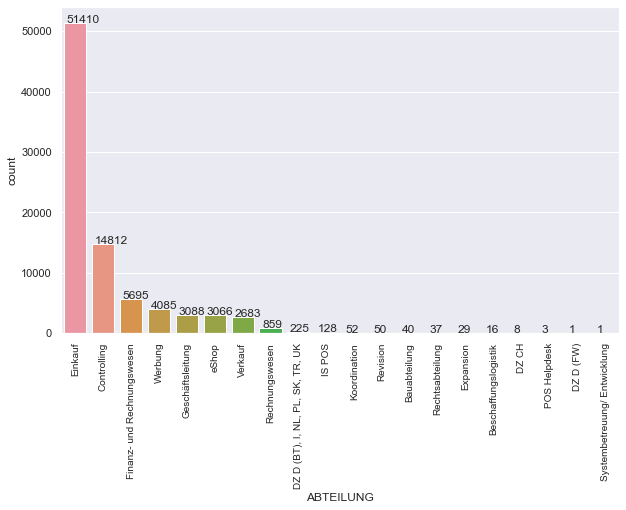

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x="ABTEILUNG", data =df,order = df['ABTEILUNG'].value_counts().index)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+20));
plt.xticks(size=10,rotation=90);  

In [47]:
df.groupby('ABTEILUNG')['User Pseudo'].nunique().sort_values(ascending=False)
# Anzahl der User nach der Abteilung 

ABTEILUNG
Einkauf                             200
Controlling                          42
Verkauf                              40
Finanz- und Rechnungswesen           38
Werbung                              36
Geschäftsleitung                     17
eShop                                12
Rechnungswesen                       10
DZ D (BT), I, NL, PL, SK, TR, UK      5
Revision                              5
Rechtsabteilung                       5
IS POS                                3
Bauabteilung                          2
POS Helpdesk                          1
Koordination                          1
Beschaffungslogistik                  1
Expansion                             1
Systembetreuung/ Entwicklung          1
DZ D (FW)                             1
DZ CH                                 1
Name: User Pseudo, dtype: int64

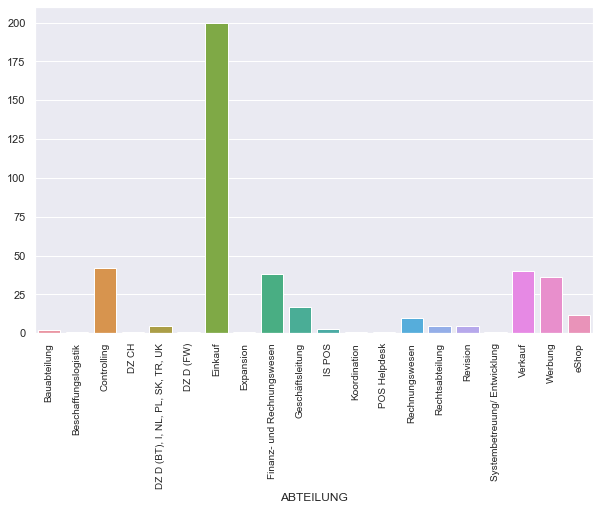

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(y = df.groupby('ABTEILUNG')['User Pseudo'].nunique().values,x=df.groupby('ABTEILUNG')[['User Pseudo']].nunique().index)

plt.xticks(size=10,rotation=90);  

In [49]:
df['BERICHT'].value_counts()

TAGROH200D.pdf              10177
TAFIAR200_SG.pdf             7202
Tag_Ums.pdf                  6580
TAFIVA200_SG_1.pdf           4140
eShop_Ums_Abs_GL.pdf         2724
                            ...  
Leerkartonfunde_mon.pdf         1
TOP50_Menge_Woche.pdf           1
11_UKL_BJ_VJ.pdf                1
Umtausch_mon.pdf                1
ExpRate_MYS_MAT_2019.pdf        1
Name: BERICHT, Length: 281, dtype: int64

In [50]:
df['IST_KONZERNBERICHT'].value_counts()

0    84050
1     2238
Name: IST_KONZERNBERICHT, dtype: int64

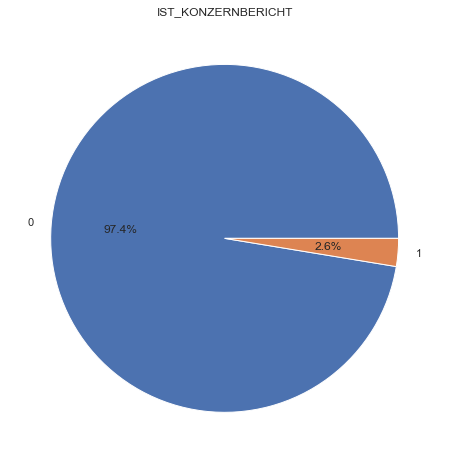

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=df['IST_KONZERNBERICHT'].value_counts(),
       labels=['0', '1'],
       autopct='%.1f%%'
       )
ax.set_title("IST_KONZERNBERICHT")
plt.show()

In [52]:
df['Anzahl'].value_counts()

1    86288
Name: Anzahl, dtype: int64

In [53]:
df.head()

,Kürzel E1,Bereich E1,Kürzel E2,Bereich E2,Ausprägung,Name,ZEIT,NR,MONAT,User Pseudo,ABTEILUNG,BERICHT,IST_KONZERNBERICHT,Anzahl,Tag,UHR
0,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-08-26 10:17:01,1926,2020-08-01,User_104,Einkauf,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1,Wednesday,10
1,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-09-22 11:02:31,13499,2020-09-01,User_404,Einkauf,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1,Tuesday,11
2,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-16 13:03:47,23214,2020-10-01,User_85,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1,Friday,13
3,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-16 15:16:31,23293,2020-10-01,User_206,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1,Friday,15
4,ESHP,eShop-Portal,ESHUMS,Umsatz und Absatz eShop,Branche_BEVH_Umsatzindex_Jahre,NaN,2020-10-22 14:52:39,24745,2020-10-01,User_85,Controlling,Branche_BEVH_Umsatzindex_Jahre.pdf,0,1,Thursday,14
